In [1]:
import pandas as pd
import numpy as np
import os
import scipy.spatial.distance
%load_ext rpy2.ipython
import rpy2.robjects.lib.ggplot2 as ggplot2

/home/stephan/.local/lib/python3.5/site-packages/rpy2/robjects/lib/ggplot2.py:67: UserWarning: This was designed againt ggplot2 version 2.2.1 but you have 3.1.0
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


In [2]:
# can families be identified with reliability using lexical features?

In [3]:
# data is at ~/notebooks/LEXSIG/tokens

In [4]:
# first load all of the datasets by key / phase

In [5]:
# first just do a metric space — whole set vs. whole set

In [6]:
token_files = os.listdir('tokens')
model_keys = np.unique([x.split('_')[0] for x in token_files])
model_keys

array(['Braunwald-Laura', 'Brown-Adam', 'Brown-Sarah', 'Kuczaj-Abe',
       'MacWhinney-Ross', 'Providence-Lily', 'Providence-Naima',
       'Suppes-Nina'], dtype='<U16')

In [7]:
tokens_store = {}
vocab = set()
for key in model_keys:
    if key not in tokens_store:
        tokens_store[key] = {}    
    phase1_df = pd.read_csv(os.path.join('tokens',key+'_phase1.csv'))
    tokens_store[key]['phase1'] = phase1_df.loc[(phase1_df.speaker_code != 'CHI')]
    vocab = vocab.union(set(tokens_store[key]['phase1']['gloss']))
    
    oldest_age_phase1 = np.max(tokens_store[key]['phase1'].target_child_age)
    
    phase2_df = pd.read_csv(os.path.join('tokens',key+'_phase2.csv'))        
    tokens_store[key]['phase2'] = phase2_df.loc[(phase2_df.target_child_age > oldest_age_phase1)
    & (phase2_df.speaker_code != 'CHI')]
    vocab = vocab.union(set(tokens_store[key]['phase2']['gloss']))

vocab = list(vocab)
vocab.sort()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#a single shared vocabulary
print(vocab[0:10])
int_to_vocab = dict(zip(range(len(vocab)),vocab))
vocab_to_int = dict(zip(vocab, range(len(vocab))))

['aardvark', 'abandon', 'abilities', 'ability', 'absolute', 'abstract', 'abuse', 'abyss', 'accent', 'access']


In [9]:
def extractWordCountVector(glossVector, vocab_to_int):
    counts = np.zeros([len(vocab_to_int.keys()),1]).astype(int)
    ints = [vocab_to_int[x] for x in glossVector]
    for i in ints:
        counts[i,0] += 1
    return(counts)

In [10]:
phase1_counts = np.hstack([extractWordCountVector(tokens_store[x]['phase1']['gloss'], vocab_to_int) \
for x in model_keys])

phase2_counts = np.hstack([extractWordCountVector(tokens_store[x]['phase2']['gloss'], vocab_to_int) \
for x in model_keys])

In [11]:
phase1_counts.shape

(6000, 8)

In [12]:
counts = np.hstack([phase1_counts, phase2_counts])
normalized_counts = counts/counts.sum(axis=0,keepdims=1)

In [13]:
#then get the distance between all of them
eu_dist = scipy.spatial.distance.pdist(counts.transpose(), 'correlation')

In [14]:
eu_dist.shape

(120,)

In [15]:
sf_df = pd.DataFrame(scipy.spatial.distance.squareform(eu_dist))
count_col_names =  ['phase1_'+key for key in model_keys] + ['phase2_'+key for key in model_keys]
sf_df.columns = count_col_names
sf_df.index = count_col_names

In [40]:
sf_df

,phase1_Braunwald-Laura,phase1_Brown-Adam,phase1_Brown-Sarah,phase1_Kuczaj-Abe,phase1_MacWhinney-Ross,phase1_Providence-Lily,phase1_Providence-Naima,phase1_Suppes-Nina,phase2_Braunwald-Laura,phase2_Brown-Adam,phase2_Brown-Sarah,phase2_Kuczaj-Abe,phase2_MacWhinney-Ross,phase2_Providence-Lily,phase2_Providence-Naima,phase2_Suppes-Nina
phase1_Braunwald-Laura,0.000000,0.528441,0.405057,0.472541,0.505369,0.537233,0.410144,0.551778,0.265629,0.503795,0.460638,0.441050,0.507488,0.482995,0.471641,0.515887
phase1_Brown-Adam,0.528441,0.000000,0.382047,0.377103,0.448808,0.471826,0.394165,0.453945,0.487762,0.230589,0.457388,0.431769,0.486158,0.469171,0.418078,0.434817
phase1_Brown-Sarah,0.405057,0.382047,0.000000,0.468347,0.448553,0.416493,0.345554,0.436527,0.357694,0.365987,0.255412,0.467552,0.452966,0.426499,0.436399,0.350176
phase1_Kuczaj-Abe,0.472541,0.377103,0.468347,0.000000,0.426807,0.467521,0.362952,0.475339,0.347358,0.302145,0.372808,0.207895,0.386554,0.312712,0.303498,0.371175
phase1_MacWhinney-Ross,0.505369,0.448808,0.448553,0.426807,0.000000,0.381269,0.420214,0.507210,0.403007,0.411895,0.490984,0.469803,0.216284,0.365766,0.424324,0.469734
phase1_Providence-Lily,0.537233,0.471826,0.416493,0.467521,0.381269,0.000000,0.329345,0.466285,0.436631,0.451098,0.507642,0.499165,0.488003,0.252708,0.397003,0.459536
phase1_Providence-Naima,0.410144,0.394165,0.345554,0.362952,0.420214,0.329345,0.000000,0.373833,0.345079,0.387109,0.449521,0.450276,0.465164,0.334780,0.192368,0.364454
phase1_Suppes-Nina,0.551778,0.453945,0.436527,0.475339,0.507210,0.466285,0.373833,0.000000,0.507219,0.427218,0.511219,0.575046,0.590731,0.493230,0.474467,0.219356
phase2_Braunwald-Laura,0.265629,0.487762,0.357694,0.347358,0.403007,0.436631,0.345079,0.507219,0.000000,0.385109,0.344486,0.365168,0.326232,0.304893,0.350436,0.373824
phase2_Brown-Adam,0.503795,0.230589,0.365987,0.302145,0.411895,0.451098,0.387109,0.427218,0.385109,0.000000,0.355008,0.337934,0.369060,0.376947,0.343349,0.326208


In [41]:
# just do a similarity matrix -- bottom corner
sf_df_target = sf_df.iloc[8:,:8]
sf_df_target
%R -i sf_df_target,model_keys

/home/stephan/.local/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [42]:
%%R 
sf_df_target

                        phase1_Braunwald.Laura phase1_Brown.Adam
phase2_Braunwald-Laura               0.2656288         0.4877625
phase2_Brown-Adam                    0.5037953         0.2305889
phase2_Brown-Sarah                   0.4606376         0.4573876
phase2_Kuczaj-Abe                    0.4410499         0.4317686
phase2_MacWhinney-Ross               0.5074885         0.4861580
phase2_Providence-Lily               0.4829952         0.4691712
phase2_Providence-Naima              0.4716409         0.4180779
phase2_Suppes-Nina                   0.5158872         0.4348166
                        phase1_Brown.Sarah phase1_Kuczaj.Abe
phase2_Braunwald-Laura           0.3576936         0.3473585
phase2_Brown-Adam                0.3659870         0.3021454
phase2_Brown-Sarah               0.2554116         0.3728078
phase2_Kuczaj-Abe                0.4675517         0.2078949
phase2_MacWhinney-Ross           0.4529661         0.3865537
phase2_Providence-Lily           0.4264995       

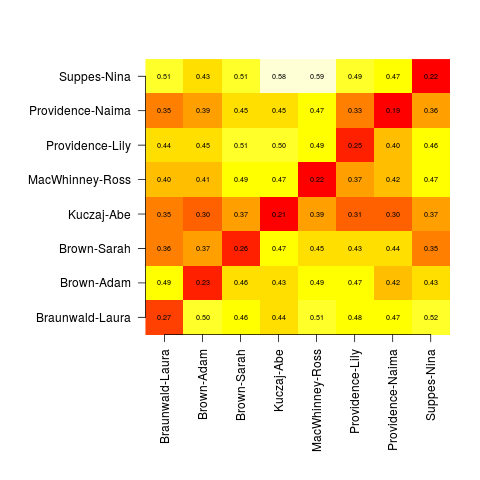

In [49]:
%%R
dst <- data.matrix(sf_df_target)
dst

dim <- ncol(dst)
par(mar=c(10,10,4,2)+0.1)
image(1:dim, 1:dim, dst, axes = FALSE, xlab="", ylab="")
axis(1, 1:dim, model_keys, cex.axis = 1, las=3)
axis(2, 1:dim, model_keys, cex.axis = 1, las=1)

 text(expand.grid(1:dim, 1:dim), sprintf("%0.2f", dst), cex=0.6)